## Проект: A/B тестирование дизайна сайта

#### Цель проекта
Провести анализ влияния двух вариантов дизайна сайта на конверсию пользователей. Определить, какой из вариантов (A или B) является более эффективным для повышения конверсии.

#### Описание эксперимента
Вариант A: Классический дизайн сайта, использующий стандартное оформление.
Вариант B: Новый дизайн сайта с улучшенной навигацией и измененным расположением кнопок, более заметной кнопкой «Купить» или другим цветовым оформлением.

#### Гипотеза
Гипотеза: Новый дизайн сайта (Вариант B) увеличит конверсию пользователей (например, покупки, регистрации) на X% по сравнению с классическим дизайном (Вариант A).

#### Метрики для анализа
1. Основная метрика:
- Конверсия (отношение числа пользователей, совершивших целевое действие, к общему числу пользователей).
2. Второстепенные метрики:
- Среднее время, проведенное на сайте.
- Показатель отказов.
- Средний чек (если применимо).


#### Этапы проекта
1. Сбор данных
 - Разделить аудиторию случайным образом на две группы: контрольная группа (Вариант A) и экспериментальная группа (Вариант B).
 - Собрать данные о поведении пользователей: просмотры страниц, клики на кнопку «Купить», время на сайте, завершенные покупки.

2. Предобработка данных
 - Проверить данные на наличие пропусков, аномалий и дубликатов.
 - Убедиться, что выборки сбалансированы по основным демографическим и поведенческим характеристикам.

3. Анализ данных
 - Посчитать конверсию и другие метрики для обеих групп.
 - Построить графики, сравнивающие показатели между группами.

4. Статистический тест
 - Применить t-тест (или другой подходящий статистический тест) для проверки статистической значимости различий между группами.
 - Проверить, что p-value меньше заданного уровня значимости (например, 0.05), чтобы принять или отклонить гипотезу.

5. Выводы
 - Интерпретировать результаты.
 - Предложить рекомендации на основе выводов.

6. Визуализация результатов
 - Создать графики: столбчатую диаграмму конверсии, распределение времени на сайте и т. д.

Мы использовали данные о пользователях, которые посетили сайт в течение двух недель. Каждому пользователю был случайным образом назначен один из двух вариантов — A или B. В данных содержатся следующие столбцы:

- user_id: Идентификатор пользователя.
- variant: Группа (A или B).
- clicks: Количество кликов пользователя на сайте.
- session_duration: Продолжительность сессии в минутах.
- conversion: Индикатор конверсии (1 — покупка, 0 — без покупки).
- device: Тип устройства пользователя (например, телефон, компьютер, планшет).
- age: Возраст пользователя.
- location: Местоположение пользователя.

In [28]:
# Импорты
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

##### Загрузка данных и предварительный анализ

In [71]:
# Загрузка данных
data = pd.read_csv('/Users/alexander/data.csv')

# Первоначальный просмотр данных
data.head(10)

,user_id,variant,clicks,session_duration,conversion,device,age,location,revenue
0,1,A,6,5.684543,0,Планшет,32,Екатеринбург,0.000000
1,2,B,0,12.983905,0,Планшет,64,Москва,0.000000
2,3,A,0,6.997259,0,Планшет,39,Санкт-Петербург,0.000000
3,4,A,1,7.046459,0,Телефон,31,Санкт-Петербург,0.000000
4,5,A,2,8.953301,0,Телефон,43,Санкт-Петербург,0.000000
5,6,B,1,3.163318,0,Компьютер,45,Екатеринбург,0.000000
6,7,A,0,10.836145,0,Компьютер,40,Новосибирск,0.000000
7,8,A,1,11.799221,1,Планшет,31,Екатеринбург,181.923423
8,9,A,2,9.131889,0,Планшет,41,Москва,0.000000
9,10,B,0,12.954053,0,Планшет,19,Екатеринбург,0.000000


In [47]:
# Проверка на пропуски
print("Количество пропусков в каждом столбце:")
print(data.isnull().sum())

Количество пропусков в каждом столбце:
user_id             0
variant             0
clicks              0
session_duration    0
conversion          0
device              0
age                 0
location            0
revenue             0
dtype: int64


In [67]:
# Обработка аномалий
# Убираем строки, где длительность сессии меньше 0
data = data[data['session_duration'] >= 0]

# Проверим, есть ли другие аномалии, например, пользователи с возрастом менее 18 лет или более 100 лет
data = data[(data['age'] >= 18) & (data['age'] <= 100)]

# Преобразование типов данных
# Убедимся, что все столбцы имеют правильный тип
data['user_id'] = data['user_id'].astype(int)
data['variant'] = data['variant'].astype('category')
data['device'] = data['device'].astype('category')
data['location'] = data['location'].astype('category')

# Преобразуем 'session_duration' в целое число, так как это длительность в минутах
data['session_duration'] = data['session_duration'].astype(int)

# Проверим результат
print("\nСтатистика по очищенным данным:\n")
display(data.describe())


Статистика по очищенным данным:



,user_id,clicks,session_duration,conversion,age,revenue
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,1.630000,7.910000,0.180000,41.890000,23.583381
std,29.011492,1.404574,3.065266,0.386123,14.119186,54.897330
min,1.000000,0.000000,1.000000,0.000000,19.000000,0.000000
25%,25.750000,1.000000,6.000000,0.000000,30.750000,0.000000
50%,50.500000,1.000000,8.000000,0.000000,42.000000,0.000000
75%,75.250000,2.000000,10.000000,0.000000,54.000000,0.000000
max,100.000000,6.000000,15.000000,1.000000,64.000000,190.511001


##### Анализ конверсии по группам

Давайте начнем с анализа конверсий (покупок) по группам A и B. Для этого:

- Рассчитаем среднюю конверсию для каждой группы.
- Проведем t-тест для независимых выборок, чтобы проверить, есть ли статистически значимая разница между конверсиями в группах A и B.


In [31]:
# Средняя конверсия по группам
conversion_rate_A = data[data['variant'] == 'A']['conversion'].mean()
conversion_rate_B = data[data['variant'] == 'B']['conversion'].mean()

# t-тест для проверки различий между конверсиями в группах A и B
t_stat, p_value = stats.ttest_ind(
    data[data['variant'] == 'A']['conversion'],
    data[data['variant'] == 'B']['conversion']
)

print(f"Средняя конверсия для группы A: {conversion_rate_A:.2f}")
print(f"Средняя конверсия для группы B: {conversion_rate_B:.2f}")
print(f"p-value для t-теста: {p_value:.4f}")


Средняя конверсия для группы A: 0.18
Средняя конверсия для группы B: 0.18
p-value для t-теста: 0.9670


##### Анализ дохода
Теперь давайте проанализируем доход (если покупка была совершена) по группам A и B. Для этого:

- Рассчитаем средний доход для каждой группы.
- Также проведем t-тест для независимых выборок для проверки разницы.

In [34]:
# Средний доход по группам
revenue_A = data[data['variant'] == 'A']['revenue'].mean()
revenue_B = data[data['variant'] == 'B']['revenue'].mean()

# t-тест для проверки различий между доходами в группах A и B
t_stat_revenue, p_value_revenue = stats.ttest_ind(
    data[data['variant'] == 'A']['revenue'],
    data[data['variant'] == 'B']['revenue']
)

print(f"Средний доход для группы A: {revenue_A:.2f}")
print(f"Средний доход для группы B: {revenue_B:.2f}")
print(f"p-value для t-теста по доходу: {p_value_revenue:.4f}")


Средний доход для группы A: 23.71
Средний доход для группы B: 23.49
p-value для t-теста по доходу: 0.9843


##### Визуализация

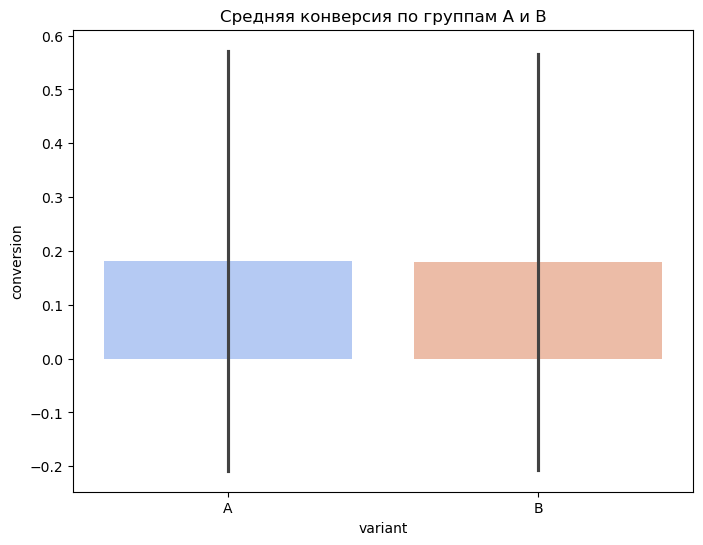

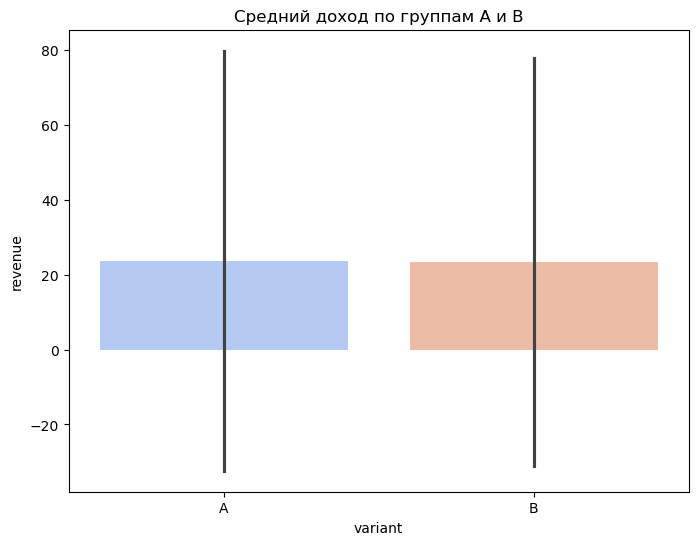

In [41]:
# Визуализация конверсий
plt.figure(figsize=(8, 6))
sns.barplot(x='variant', y='conversion', data=data, errorbar='sd', palette='coolwarm', hue='variant')
plt.title('Средняя конверсия по группам A и B')
plt.show()

# Визуализация дохода
plt.figure(figsize=(8, 6))
sns.barplot(x='variant', y='revenue', data=data, errorbar='sd', palette='coolwarm', hue='variant')
plt.title('Средний доход по группам A и B')
plt.show()

#### Можно сделать следующие выводы:

1. Конверсия: Средняя конверсия для группы A и группы B одинакова (0.18), и p-value для t-теста (0.9670) указывает на то, что различий между группами нет. Это означает, что изменение, которое было произведено в эксперименте (например, изменение дизайна, функционала и т.д.), не оказало значительного влияния на конверсию.

2. Доход: Средний доход также схож между группами (23.71 для группы A и 23.49 для группы B), и p-value для t-теста (0.9843) подтверждает, что различий между группами по доходу нет. Это также говорит о том, что изменения не повлияли на финансовые результаты.